In [2]:
import pandas as pd
train = pd.read_csv('/home/jovyan/Data/fashionmnist/fashion-mnist_train.csv')

In [3]:
test = pd.read_csv('/home/jovyan/Data/fashionmnist/fashion-mnist_test.csv')

In [4]:
import numpy as np

In [5]:
X = train.iloc[:,1:].to_numpy()
y = train.iloc[:,0].to_numpy()

In [6]:
X.shape

(60000, 784)

In [7]:
X2 = X.reshape((60000, 28, 28))

In [8]:
import matplotlib.pyplot as plt

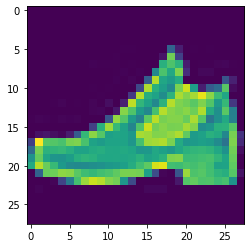

In [9]:
plt.imshow(X2[1,:,:])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.text import one_hot

In [11]:
yhot = pd.get_dummies(train.iloc[:,0].astype('str'))

In [12]:
yhot.shape

(60000, 10)

In [13]:
X3 = X2[:,:,:,None]

In [14]:
X3.shape

(60000, 28, 28, 1)

In [15]:
classifier = Sequential()

classifier.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1) ))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(yhot.shape[1]))
classifier.add(Activation('softmax'))

In [16]:
from tensorflow.keras.losses import categorical_crossentropy

In [17]:
classifier.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

In [19]:
yhot_test = pd.get_dummies(test.iloc[:,0].astype('str'))

In [20]:
yhot_test.shape

(10000, 10)

In [21]:
X_test = test.iloc[:,1:].to_numpy().reshape((10000, 28, 28))

In [22]:
X_test = X_test[:,:,:,None]

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
classifier.fit( X3, yhot,
                        epochs=5,
                         validation_data=(X_test, yhot_test)
                        )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.5185 - accuracy: 0.8445 - val_loss: 0.3245 - val_accuracy: 0.8852
Epoch 2/5
60000/60000 [==============================] - 39s 646us/sample - loss: 0.2900 - accuracy: 0.8956 - val_loss: 0.2784 - val_accuracy: 0.9013
Epoch 3/5
60000/60000 [==============================] - 40s 673us/sample - loss: 0.2493 - accuracy: 0.9096 - val_loss: 0.2707 - val_accuracy: 0.8999
Epoch 4/5
60000/60000 [==============================] - 40s 669us/sample - loss: 0.2219 - accuracy: 0.9182 - val_loss: 0.2530 - val_accuracy: 0.9093
Epoch 5/5
60000/60000 [==============================] - 41s 686us/sample - loss: 0.1958 - accuracy: 0.9278 - val_loss: 0.2700 - val_accuracy: 0.9135


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred[0]

En kjapp forklaring av tapsfunksjonen vår, categorical_crossentropy:

Output av funksjonen er en vektor med sannsynligheter for hver klasse, altså tall mellom 0 og 1. Y er en vektor med de sanne klassene, altså en vektor med 0 i alle elementer unntatt den sanne klassen, hvor vektoren er 1.

Enhver funksjon som blir lavere desto mindre foskjellen mellom disse to vektorene er, vil kunne fungere som tapsfunksjon. categorical_crossentropy (her illustrert med spesialtilfellet binary_crossentropy) er som følger:


$$-\frac{1}{N}\sum{y_{i}*log(p_{i}) + (1-y_{i})*log(1-p_{i})}$$

For å få en litt bedre forståelse er kanskje denne kalkulatoren grei:

In [35]:
import math
# i eksempelet er y=1, så tapet blir lavere jo nærmere p er 1
p=0.99

-(1*math.log(p) + 0*(1-math.log(1-p)))


0.01005033585350145